In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#scaling factor
sf = 2.3
#number of samples taken
samp_num = 200
#true reference value -- not the estimated value
ref_val = np.random.rand()*sf
#noisy sensor data going with the assumption that the noise is Gaussian
#see the extended Kalman filter if this is not the case
measurements = np.random.normal(ref_val, size = samp_num)

In [4]:
def plot_estimate(est):
    plt.figure()
    plt.xlabel("t")
    plt.ylabel("Measured value")

    plt.axhline(ref_val, color = 'b', label = 'true value')
    plt.plot(measurements, 'k+', label = 'measurements')
    if(est is not None):
        plt.plot(est, 'r-', label='state estimate')
    
    plt.legend()

    plt.show()

In [5]:
def squared_error(true, est):
    return np.average(np.power(true-est, 2)[1,:])

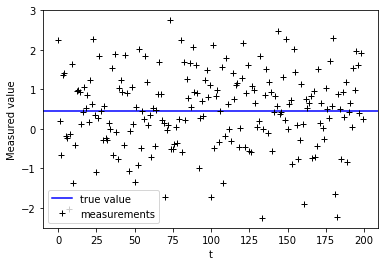

In [6]:
plot_estimate(None)

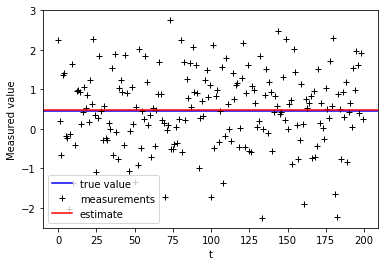

In [7]:
#wait for all measurements and average results to estimate state
#really not an ideal or even functional state estimator
avg_meas = np.average(measurements)

plt.figure()
plt.xlabel("t")
plt.ylabel("Measured value")

plt.axhline(ref_val, color = 'b', label = 'true value')
plt.plot(measurements, 'k+', label = 'measurements')
plt.axhline(avg_meas, color = 'r', label='estimate')
    
plt.legend()

plt.show()

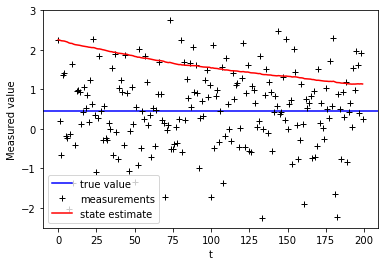

In [10]:
#estimate state based on a running average of all measurements taken
#not really ideal or practical
running_avg = np.empty([samp_num])
running_avg[0] = measurements[0]
for i in range(1, samp_num):
    running_avg[i] = running_avg[i-1]+(1/samp_num)*(measurements[i]-running_avg[i-1])
plot_estimate(running_avg)


In [11]:
#average of squared errors between a true value and a set of predictions
def compute_cost(true_val, est):
    return np.power(true_val-est, 2)

In [21]:
#g-h filter also called alpha beta filter

#estimate based off model
gh_estimates = np.empty([1, samp_num])
#vector of productions
gh_predictions = np.empty([1, samp_num])

#guess that the gain rate is 1 -- this parameter can be tuned a bit
gain_rate = -1

#initial guess as to state of system
state_est = 1

#time betwen measurements
dt = 1
scale = 0.4
count = 0
#weighting factor between measurements and predictions
#if the model is more trustworthy, set this low
#if the model is noisy and measurements are not, set this higher
gs = 0.01

for dp in measurements:
    #predict the state based off current linear model
    predicted = state_est + gain_rate * dt
    gh_predictions[0, count] = predicted
    
    #calculate residual between measured value and predicted value
    #in other words, edit the model gain to be consistent with measured values
    residual = dp - predicted
    gain_rate += gs * (residual / dt)
    
    #update the prediction based on measurement
    predicted += scale*residual
    gh_estimates[0, count] = predicted
    count += 1
    
gh_cost = compute_cost(ref_val, gh_predictions)

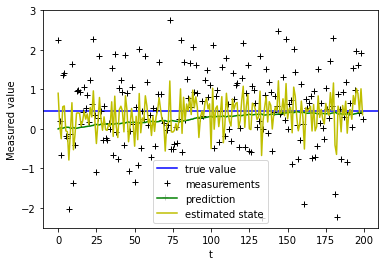

In [22]:
plt.figure()
plt.xlabel("t")
plt.ylabel("Measured value")

plt.axhline(ref_val, color = 'b', label = 'true value')
plt.plot(measurements, 'k+', label = 'measurements')
    
plt.plot(gh_predictions[0,:], 'g', label = "prediction")
plt.plot(gh_estimates[0,:], 'y', label = "estimated state")
plt.legend()

plt.show()

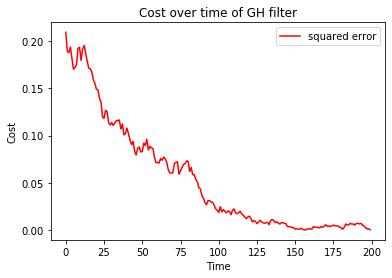

In [23]:
plt.figure()

plt.ylabel("Cost")
plt.xlabel("Time")
plt.title("Cost over time of GH filter")

plt.plot(gh_cost[0, :], color = 'r', label = "squared error")
plt.legend()
plt.show()

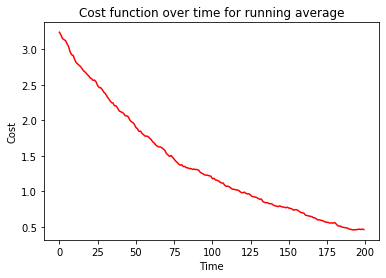

In [24]:
running_avg_cost = compute_cost(ref_val, running_avg)

plt.ylabel("Cost")
plt.xlabel("Time")
plt.title("Cost function over time for running average")

plt.plot(running_avg_cost, color = 'r')
plt.show()

In [37]:
print("Final cost of the average accumulator is {}. Final cost of the gh filter is {}."
      .format(running_avg_cost[running_avg_cost.size-1], gh_cost[0, gh_cost.size-1]))

Final cost of the average accumulator is 0.46226091925416163. Final cost of the gh filter is 0.0006310295394531064.
